In [1]:
import pandas as pd
import numpy as np
import os
cwd = os.getcwd()
print(cwd)

/scratch/cs/infantbiome/huy


In [2]:
# Load data
import matplotlib.patches as mpatches 
from core import * 
from scipy.signal import find_peaks

Adr = pd.read_csv('./02_Atlas_result/Adr/GP_result_Adr.csv')
Adr = Adr.iloc[:,1:]
Adr_supp = pd.read_csv('./02_Atlas_result/Adr/GP_result_Adr_supp.csv')
Adr_supp = Adr_supp.iloc[:,1:]
Adr = pd.concat([Adr,Adr_supp], axis=0, ignore_index = True)

Aor = pd.read_csv('./02_Atlas_result/Aor/GP_result_Aor.csv')
Aor = Aor.iloc[:,1:]
Aor_supp = pd.read_csv('./02_Atlas_result/Aor/GP_result_Aor_supp.csv')
Aor_supp = Aor_supp.iloc[:,1:]
Aor = pd.concat([Aor,Aor_supp], axis=0, ignore_index = True)

BFat = pd.read_csv('./02_Atlas_result/BFat/GP_result_BFat.csv')
BFat = BFat.iloc[:,1:]
BFat_supp = pd.read_csv('./02_Atlas_result/BFat/GP_result_BFat_supp.csv')
BFat_supp = BFat_supp.iloc[:,1:]
BFat = pd.concat([BFat,BFat_supp], axis=0, ignore_index = True)

Bstm = pd.read_csv('./02_Atlas_result/Bstm/GP_result_Bstm.csv')
Bstm = Bstm.iloc[:,1:]
Bstm_supp = pd.read_csv('./02_Atlas_result/Bstm/GP_result_Bstm_supp.csv')
Bstm_supp = Bstm_supp.iloc[:,1:]
Bstm = pd.concat([Bstm,Bstm_supp], axis=0, ignore_index = True)

Cer = pd.read_csv('./02_Atlas_result/Cer/GP_result_Cer.csv')
Cer = Cer.iloc[:,1:]
Cer_supp = pd.read_csv('./02_Atlas_result/Cer/GP_result_Cer_supp.csv')
Cer_supp = Cer_supp.iloc[:,1:]
Cer = pd.concat([Cer,Cer_supp], axis=0, ignore_index = True)

Hrt = pd.read_csv('./02_Atlas_result/Hrt/GP_result_Hrt.csv')
Hrt = Hrt.iloc[:,1:]
Hrt_supp = pd.read_csv('./02_Atlas_result/Hrt/GP_result_Hrt_supp.csv')
Hrt_supp = Hrt_supp.iloc[:,1:]
Hrt = pd.concat([Hrt,Hrt_supp], axis=0, ignore_index = True)

Hyp = pd.read_csv('./02_Atlas_result/Hyp/GP_result_Hyp.csv')
Hyp = Hyp.iloc[:,1:]
Hyp_supp = pd.read_csv('./02_Atlas_result/Hyp/GP_result_Hyp_supp.csv')
Hyp_supp = Hyp_supp.iloc[:,1:]
Hyp = pd.concat([Hyp,Hyp_supp], axis=0, ignore_index = True)

Kid = pd.read_csv('./02_Atlas_result/Kid/GP_result_Kid.csv')
Kid = Kid.iloc[:,1:]
Kid_supp = pd.read_csv('./02_Atlas_result/Kid/GP_result_Kid_supp.csv')
Kid_supp = Kid_supp.iloc[:,1:]
Kid = pd.concat([Kid,Kid_supp], axis=0, ignore_index = True)

Liv = pd.read_csv('./02_Atlas_result/Liv/GP_result_Liv.csv')
Liv = Liv.iloc[:,1:]
Liv_supp = pd.read_csv('./02_Atlas_result/Liv/GP_result_Liv_supp.csv')
Liv_supp = Liv_supp.iloc[:,1:]
Liv = pd.concat([Liv,Liv_supp], axis=0, ignore_index = True)

Lun = pd.read_csv('./02_Atlas_result/Lun/GP_result_Lun.csv')
Lun = Lun.iloc[:,1:]
Lun_supp = pd.read_csv('./02_Atlas_result/Lun/GP_result_Lun_supp.csv')
Lun_supp = Lun_supp.iloc[:,1:]
Lun = pd.concat([Lun,Lun_supp], axis=0, ignore_index = True)

Mus = pd.read_csv('./02_Atlas_result/Mus/GP_result_Mus.csv')
Mus = Mus.iloc[:,1:]
Mus_supp = pd.read_csv('./02_Atlas_result/Mus/GP_result_Mus_supp.csv')
Mus_supp = Mus_supp.iloc[:,1:]
Mus = pd.concat([Mus,Mus_supp], axis=0, ignore_index = True)

WFat = pd.read_csv('./02_Atlas_result/WFat/GP_result_WFat.csv')
WFat = WFat.iloc[:,1:]
WFat_supp = pd.read_csv('./02_Atlas_result/WFat/GP_result_WFat_supp.csv')
WFat_supp = WFat_supp.iloc[:,1:]
WFat = pd.concat([WFat,WFat_supp], axis=0, ignore_index = True)

In [3]:
KO = pd.read_csv('./06_XBP1_result/KO/GP_result_KO.csv') #4666/2764/269 (24)   726/0 (12)
KO = KO.iloc[:,1:]
KO_supp = pd.read_csv('./06_XBP1_result/KO/GP_result_KO_supp.csv')
KO_supp = KO_supp.iloc[:,1:]
KO = pd.concat([KO,KO_supp], axis=0, ignore_index = True)

WT = pd.read_csv('./06_XBP1_result/WT/GP_result_WT.csv') #4338/2290/340 (24)   592/5 (12)
WT = WT.iloc[:,1:]
WT_supp = pd.read_csv('./06_XBP1_result/WT/GP_result_WT_supp.csv')
WT_supp = WT_supp.iloc[:,1:]
WT = pd.concat([WT,WT_supp], axis=0, ignore_index = True)

In [4]:
organs = [Adr, Aor, BFat, Bstm, Cer, Hrt, Hyp, Kid, Liv, Lun, Mus, WFat]

In [4]:
Hyp[Hyp['Gene.ID'] == 'Bmal1']

,Gene.ID,Period,SNR,nSNR,LLR,phase
214,Bmal1,24.0,4.167494,1.348393,0.037442,21


In [53]:
Hrt[Hrt['Gene.ID'] == 'Bmal1']

,Gene.ID,Period,SNR,nSNR,LLR,phase
12665,Bmal1,24.0,6.445077,2.254616,0.343351,22


In [42]:
Bstm[Bstm['Gene.ID'] == 'Cry2']

,Gene.ID,Period,SNR,nSNR,LLR,phase
5739,Cry2,22.0,2.00554,0.832649,-0.944094,12


In [ ]:
Liv_data_forward = WT[WT['Gene_ID']]

gene  = np.array(Liv_data_forward.iloc[i,1:], dtype = np.float32) #data.iloc[x,1:]
x_torch = Array(np.arange(22,65,6)).to_tensor() 
x_scale = Array(np.arange(22,65,1)).to_tensor() 

t_torch = Array(gene.reshape(-1,1)).to_tensor()
t_torch.norm()

param_GP = Parameters()
param_GP.p = Liv_plot_forward['Period'].values[i]
param_GP.l = Liv_plot_forward['Lengthscale'].values[i]
param_GP.sigma_f2 = Liv_plot_forward['Var'].values[i]
param_GP.sigma_n2 = Liv_plot_forward['Noise'].values[i]

final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
final_pse.plot_f_gp(new_pse, color = color_plt[i])
final_pse.plot_data(color = color_plt[i])

In [27]:
for i in organs:
    print(i[i['Gene.ID'] == 'Clock'])

    Gene.ID  Period       SNR      nSNR       LLR  phase
157   Clock    22.0  4.700751  2.090453  0.378473     21
    Gene.ID  Period       SNR      nSNR       LLR  phase
141   Clock    22.0  5.187936  2.139954  0.330594      2
   Gene.ID  Period     SNR      nSNR     LLR  phase
59   Clock    22.0  5.8611  2.575477  0.4691      2
      Gene.ID  Period      SNR     nSNR       LLR  phase
12794   Clock    10.0  1.83758  0.91879 -1.074731      5
     Gene.ID  Period       SNR      nSNR      LLR  phase
2987   Clock    24.0  2.124571  0.685191 -0.70115     24
     Gene.ID  Period      SNR      nSNR       LLR  phase
7207   Clock    20.0  4.15218  1.434028 -0.469282      6
     Gene.ID  Period       SNR      nSNR       LLR  phase
3637   Clock    14.0  2.181818  1.090909 -0.949648      7
    Gene.ID  Period       SNR      nSNR       LLR  phase
732   Clock    24.0  4.028159  1.313449  0.091628     20
     Gene.ID  Period       SNR      nSNR       LLR  phase
1400   Clock    24.0  4.360449  1.6981

In [6]:
for i in organs:
    print(i[i['Gene.ID'] == 'Cry1'])

    Gene.ID  Period        SNR      nSNR       LLR  phase
150    Cry1    24.0  18.614023  6.608612  0.999962     16
    Gene.ID  Period       SNR      nSNR       LLR  phase
981    Cry1    22.0  3.949249  1.675848  0.069243     19
     Gene.ID  Period       SNR      nSNR       LLR  phase
1724    Cry1    24.0  6.977062  2.777528  0.323426     18
     Gene.ID  Period       SNR      nSNR       LLR  phase
1155    Cry1    24.0  5.193117  2.278749 -0.209719     13
   Gene.ID  Period       SNR      nSNR       LLR  phase
97    Cry1    24.0  5.337594  2.212421  0.328771     17
     Gene.ID  Period       SNR      nSNR      LLR  phase
1543    Cry1    24.0  4.367564  1.882597  0.40827     17
     Gene.ID  Period       SNR      nSNR       LLR  phase
9125    Cry1    14.0  3.160874  1.580437 -0.902156      2
    Gene.ID  Period       SNR      nSNR      LLR  phase
334    Cry1    24.0  7.832946  2.769934  0.20787     17
     Gene.ID  Period       SNR      nSNR       LLR  phase
3946    Cry1    24.0  7.14

In [7]:
for i in organs:
    print(i[i['Gene.ID'] == 'Cry2'])

    Gene.ID  Period       SNR      nSNR       LLR  phase
438    Cry2    24.0  4.046742  1.629451  0.048096      9
    Gene.ID  Period       SNR      nSNR      LLR  phase
407    Cry2    22.0  3.642152  1.313685 -0.47944     13
     Gene.ID  Period       SNR      nSNR       LLR  phase
9096    Cry2    24.0  2.687338  0.938925 -1.261816     11
     Gene.ID  Period      SNR      nSNR       LLR  phase
5739    Cry2    22.0  2.00554  0.832649 -0.944094     12
    Gene.ID  Period       SNR      nSNR      LLR  phase
752    Cry2    24.0  2.996836  1.140833 -0.09308     13
    Gene.ID  Period      SNR      nSNR       LLR  phase
665    Cry2    22.0  3.98865  1.831516  0.139332     13
     Gene.ID  Period       SNR     nSNR       LLR  phase
3974    Cry2    20.0  2.736755  1.23442 -0.782846     13
     Gene.ID  Period       SNR      nSNR       LLR  phase
2675    Cry2    24.0  3.169713  1.194406  0.077933     11
     Gene.ID  Period       SNR      nSNR       LLR  phase
2700    Cry2    24.0  3.745067  

In [8]:
for i in organs:
    print(i[i['Gene.ID'] == 'Per1'])

    Gene.ID  Period       SNR      nSNR       LLR  phase
935    Per1    22.0  3.265243  1.139199  0.126106     12
     Gene.ID  Period       SNR      nSNR       LLR  phase
3025    Per1    22.0  4.506173  1.711627  0.173893     12
     Gene.ID  Period       SNR      nSNR       LLR  phase
4064    Per1    22.0  3.351332  1.402941  0.117054     12
     Gene.ID  Period       SNR      nSNR       LLR  phase
4813    Per1    18.0  3.475194  1.737597 -0.357219      1
     Gene.ID  Period       SNR      nSNR       LLR  phase
1624    Per1    22.0  5.035849  2.077102  0.019434     12
     Gene.ID  Period       SNR      nSNR       LLR  phase
5344    Per1    22.0  5.615254  1.927058  0.028422     12
     Gene.ID  Period       SNR      nSNR       LLR  phase
6781    Per1    18.0  3.177611  1.588805 -0.625331     17
     Gene.ID  Period       SNR      nSNR       LLR  phase
1378    Per1    22.0  3.208136  1.294904  0.091864     12
     Gene.ID  Period       SNR      nSNR       LLR  phase
1386    Per1    

In [9]:
for i in organs:
    print(i[i['Gene.ID'] == 'Per2'])

    Gene.ID  Period      SNR      nSNR       LLR  phase
893    Per2    22.0  8.59375  2.552546  0.389266     14
     Gene.ID  Period       SNR     nSNR       LLR  phase
1702    Per2    22.0  4.104913  1.40337  0.093971     13
     Gene.ID  Period       SNR      nSNR       LLR  phase
1410    Per2    22.0  7.598335  3.243817  0.534284     14
    Gene.ID  Period       SNR      nSNR       LLR  phase
242    Per2    22.0  5.044086  2.225387 -0.151743     15
    Gene.ID  Period       SNR      nSNR       LLR  phase
724    Per2    24.0  4.316227  1.856866  0.097909     13
     Gene.ID  Period       SNR      nSNR       LLR  phase
1365    Per2    24.0  4.336095  1.587728  0.298352     11
     Gene.ID  Period       SNR      nSNR       LLR  phase
1033    Per2    20.0  2.040582  0.929776 -1.065344     15
     Gene.ID  Period      SNR      nSNR      LLR  phase
1296    Per2    24.0  4.45696  1.908036  0.28807     12
    Gene.ID  Period       SNR      nSNR       LLR  phase
564    Per2    24.0  7.259232

In [10]:
for i in organs:
    print(i[i['Gene.ID'] == 'Per3'])

    Gene.ID  Period       SNR      nSNR       LLR  phase
114    Per3    22.0  6.600482  2.567223  0.593454     12
   Gene.ID  Period       SNR      nSNR       LLR  phase
18    Per3    24.0  7.722161  3.060369  0.550795     10
    Gene.ID  Period      SNR      nSNR       LLR  phase
616    Per3    24.0  5.07693  2.031277  0.422233     12
    Gene.ID  Period       SNR     nSNR       LLR  phase
154    Per3    24.0  4.877501  2.06051  0.198109     11
    Gene.ID  Period       SNR      nSNR       LLR  phase
258    Per3    22.0  4.726004  1.711289  0.170036     13
   Gene.ID  Period       SNR      nSNR       LLR  phase
34    Per3    22.0  6.478142  2.800538  0.506929     13
    Gene.ID  Period       SNR      nSNR       LLR  phase
173    Per3    24.0  6.960107  2.892697  0.231862     10
    Gene.ID  Period       SNR      nSNR       LLR  phase
191    Per3    22.0  7.478518  3.376391  0.607745     12
    Gene.ID  Period        SNR      nSNR       LLR  phase
189    Per3    24.0  10.395234  4.5336

In [5]:
Adr_plot = pd.read_csv('./02_Atlas_result/Adr/plot_Adr.csv')
Adr_plot = Adr_plot.iloc[:,1:]
Adr_plot_supp = pd.read_csv('./02_Atlas_result/Adr/plot_Adr_supp.csv')
Adr_plot_supp = Adr_plot_supp.iloc[:,1:]
Adr_plot = pd.concat([Adr_plot,Adr_plot_supp], axis=0, ignore_index = True)

Aor_plot = pd.read_csv('./02_Atlas_result/Aor/plot_Aor.csv')
Aor_plot = Aor_plot.iloc[:,1:]
Aor_plot_supp = pd.read_csv('./02_Atlas_result/Aor/plot_Aor_supp.csv')
Aor_plot_supp = Aor_plot_supp.iloc[:,1:]
Aor_plot = pd.concat([Aor_plot,Aor_plot_supp], axis=0, ignore_index = True)

BFat_plot = pd.read_csv('./02_Atlas_result/BFat/plot_BFat.csv')
BFat_plot = BFat_plot.iloc[:,1:]
BFat_plot_supp = pd.read_csv('./02_Atlas_result/BFat/plot_BFat_supp.csv')
BFat_plot_supp = BFat_plot_supp.iloc[:,1:]
BFat_plot = pd.concat([BFat_plot,BFat_plot_supp], axis=0, ignore_index = True)

Bstm_plot = pd.read_csv('./02_Atlas_result/Bstm/plot_Bstm.csv')
Bstm_plot = Bstm_plot.iloc[:,1:]
Bstm_plot_supp = pd.read_csv('./02_Atlas_result/Bstm/plot_Bstm_supp.csv')
Bstm_plot_supp = Bstm_plot_supp.iloc[:,1:]
Bstm_plot = pd.concat([Bstm_plot,Bstm_plot_supp], axis=0, ignore_index = True)

Cer_plot = pd.read_csv('./02_Atlas_result/Cer/plot_Cer.csv')
Cer_plot = Cer_plot.iloc[:,1:]
Cer_plot_supp = pd.read_csv('./02_Atlas_result/Cer/plot_Cer_supp.csv')
Cer_plot_supp = Cer_plot_supp.iloc[:,1:]
Cer_plot = pd.concat([Cer_plot,Cer_plot_supp], axis=0, ignore_index = True)

Hrt_plot = pd.read_csv('./02_Atlas_result/Hrt/plot_Hrt.csv')
Hrt_plot = Hrt_plot.iloc[:,1:]
Hrt_plot_supp = pd.read_csv('./02_Atlas_result/Hrt/plot_Hrt_supp.csv')
Hrt_plot_supp = Hrt_plot_supp.iloc[:,1:]
Hrt_plot = pd.concat([Hrt_plot,Hrt_plot_supp], axis=0, ignore_index = True)

Hyp_plot = pd.read_csv('./02_Atlas_result/Hyp/plot_Hyp.csv')
Hyp_plot = Hyp_plot.iloc[:,1:]
Hyp_plot_supp = pd.read_csv('./02_Atlas_result/Hyp/plot_Hyp_supp.csv')
Hyp_plot_supp = Hyp_plot_supp.iloc[:,1:]
Hyp_plot = pd.concat([Hyp_plot,Hyp_plot_supp], axis=0, ignore_index = True)

Kid_plot = pd.read_csv('./02_Atlas_result/Kid/plot_Kid.csv')
Kid_plot = Kid_plot.iloc[:,1:]
Kid_plot_supp = pd.read_csv('./02_Atlas_result/Kid/plot_Kid_supp.csv')
Kid_plot_supp = Kid_plot_supp.iloc[:,1:]
Kid_plot = pd.concat([Kid_plot,Kid_plot_supp], axis=0, ignore_index = True)

Liv_plot = pd.read_csv('./02_Atlas_result/Liv/plot_Liv.csv')
Liv_plot = Liv_plot.iloc[:,1:]
Liv_plot_supp = pd.read_csv('./02_Atlas_result/Liv/plot_Liv_supp.csv')
Liv_plot_supp = Liv_plot_supp.iloc[:,1:]
Liv_plot = pd.concat([Liv_plot,Liv_plot_supp], axis=0, ignore_index = True)

Lun_plot = pd.read_csv('./02_Atlas_result/Lun/plot_Lun.csv')
Lun_plot = Lun_plot.iloc[:,1:]
Lun_plot_supp = pd.read_csv('./02_Atlas_result/Lun/plot_Lun_supp.csv')
Lun_plot_supp = Lun_plot_supp.iloc[:,1:]
Lun_plot = pd.concat([Lun_plot,Lun_plot_supp], axis=0, ignore_index = True)

Mus_plot = pd.read_csv('./02_Atlas_result/Mus/plot_Mus.csv')
Mus_plot = Mus_plot.iloc[:,1:]
Mus_plot_supp = pd.read_csv('./02_Atlas_result/Mus/plot_Mus_supp.csv')
Mus_plot_supp = Mus_plot_supp.iloc[:,1:]
Mus_plot = pd.concat([Mus_plot,Mus_plot_supp], axis=0, ignore_index = True)

WFat_plot = pd.read_csv('./02_Atlas_result/WFat/plot_WFat.csv')
WFat_plot = WFat_plot.iloc[:,1:]
WFat_plot_supp = pd.read_csv('./02_Atlas_result/WFat/plot_WFat_supp.csv')
WFat_plot_supp = WFat_plot.iloc[:,1:]
WFat_plot = pd.concat([WFat_plot,WFat_plot_supp], axis=0, ignore_index = True)


In [6]:
Liv_data = pd.read_csv('./01_Atlas_data/High_exp_Liv.csv')
Liv_data_supp = pd.read_csv('./01_Atlas_data/Liv_supp.csv')
Liv_data = pd.concat([Liv_data,Liv_data_supp], axis=0, ignore_index = True)


Adr_data = pd.read_csv('./01_Atlas_data/High_exp_Adr.csv')
Adr_data_supp = pd.read_csv('./01_Atlas_data/Adr_supp.csv')
Adr_data = pd.concat([Adr_data,Adr_data_supp], axis=0, ignore_index = True)

Aor_data = pd.read_csv('./01_Atlas_data/High_exp_Aor.csv')
Aor_data_supp = pd.read_csv('./01_Atlas_data/Aor_supp.csv')
Aor_data = pd.concat([Aor_data,Aor_data_supp], axis=0, ignore_index = True)

BFat_data = pd.read_csv('./01_Atlas_data/High_exp_BFat.csv')
BFat_data_supp = pd.read_csv('./01_Atlas_data/BFat_supp.csv')
BFat_data = pd.concat([BFat_data,BFat_data_supp], axis=0, ignore_index = True)

Bstm_data = pd.read_csv('./01_Atlas_data/High_exp_Bstm.csv')
Bstm_data_supp = pd.read_csv('./01_Atlas_data/Bstm_supp.csv')
Bstm_data = pd.concat([Bstm_data,Bstm_data_supp], axis=0, ignore_index = True)

Cer_data = pd.read_csv('./01_Atlas_data/High_exp_Cer.csv')
Cer_data_supp = pd.read_csv('./01_Atlas_data/Cer_supp.csv')
Cer_data = pd.concat([Cer_data,Cer_data_supp], axis=0, ignore_index = True)

Hrt_data = pd.read_csv('./01_Atlas_data/High_exp_Hrt.csv')
Hrt_data_supp = pd.read_csv('./01_Atlas_data/Hrt_supp.csv')
Hrt_data = pd.concat([Hrt_data,Hrt_data_supp], axis=0, ignore_index = True)

Hyp_data = pd.read_csv('./01_Atlas_data/High_exp_Hyp.csv')
Hyp_data_supp = pd.read_csv('./01_Atlas_data/Hyp_supp.csv')
Hyp_data = pd.concat([Hyp_data,Hyp_data_supp], axis=0, ignore_index = True)

Kid_data = pd.read_csv('./01_Atlas_data/High_exp_Kid.csv')
Kid_data_supp = pd.read_csv('./01_Atlas_data/Kid_supp.csv')
Kid_data = pd.concat([Kid_data,Kid_data_supp], axis=0, ignore_index = True)

Lun_data = pd.read_csv('./01_Atlas_data/High_exp_Lun.csv')
Lun_data_supp = pd.read_csv('./01_Atlas_data/Lun_supp.csv')
Lun_data = pd.concat([Lun_data,Lun_data_supp], axis=0, ignore_index = True)

Mus_data = pd.read_csv('./01_Atlas_data/High_exp_Mus.csv')
Mus_data_supp = pd.read_csv('./01_Atlas_data/Mus_supp.csv')
Mus_data = pd.concat([Mus_data,Mus_data_supp], axis=0, ignore_index = True)

WFat_data = pd.read_csv('./01_Atlas_data/High_exp_WFat.csv')
WFat_data_supp = pd.read_csv('./01_Atlas_data/WFat_supp.csv')
WFat_data = pd.concat([WFat_data,WFat_data_supp], axis=0, ignore_index = True)

In [13]:
#Liv_plot[Liv_plot['Gene.ID'].isin(['Bmal1','Clock','Per1','Per3','Cry2'])]
Liv[Liv['Gene.ID'].isin(['Bmal1','Clock','Per1','Per3','Cry2'])]

,Gene.ID,Period,SNR,nSNR,LLR,phase
57,Bmal1,22.0,7.399435,3.339030,0.615877,22
189,Per3,24.0,10.395234,4.533606,0.641182,10
1386,Per1,22.0,4.980671,1.762028,0.245083,12
1400,Clock,24.0,4.360449,1.698142,-0.059323,22
2700,Cry2,24.0,3.745067,1.416441,0.217081,12


In [11]:
Liv_plot_forward = Liv_plot[Liv_plot['Gene.ID'].isin(['Bmal1','Clock'])]
Liv_plot_backward = Liv_plot[Liv_plot['Gene.ID'].isin(['Per3','Cry2'])]
Liv_data_forward = Liv_data[Liv_data['Gene.ID'].isin(['Bmal1','Clock'])]
Liv_data_backward = Liv_data[Liv_data['Gene.ID'].isin(['Per3','Cry2'])]
Liv_res_forward = Liv[Liv['Gene.ID'].isin(['Bmal1','Clock'])]
Liv_res_backward = Liv[Liv['Gene.ID'].isin(['Per3','Cry2'])]

In [30]:
Liv_data_forward

,Gene.ID,Liv_CT22,Liv_CT28,Liv_CT34,Liv_CT40,Liv_CT46,Liv_CT52,Liv_CT58,Liv_CT64
57,Bmal1,1361.126554,679.555083,33.000381,599.410364,1268.322075,200.844933,64.538529,877.318247
1400,Clock,2306.561756,2209.981658,999.636544,1634.371117,2072.654969,1603.151468,675.956173,1354.665082


In [15]:
Liv_plot_backward

,Gene.ID,Period,Period_null,Lengthscale,Lengthscale_null,Var,Var_null,Noise,Noise_null
189,Per3,24.0,300.0,2.292928,8.0,2.621489,0.05,0.024259,0.905088
2700,Cry2,24.0,300.0,2.643999,8.0,1.447309,0.05,0.103191,0.912095


Text(0.5, 0.98, 'Validation of core genes mechanism in liver')

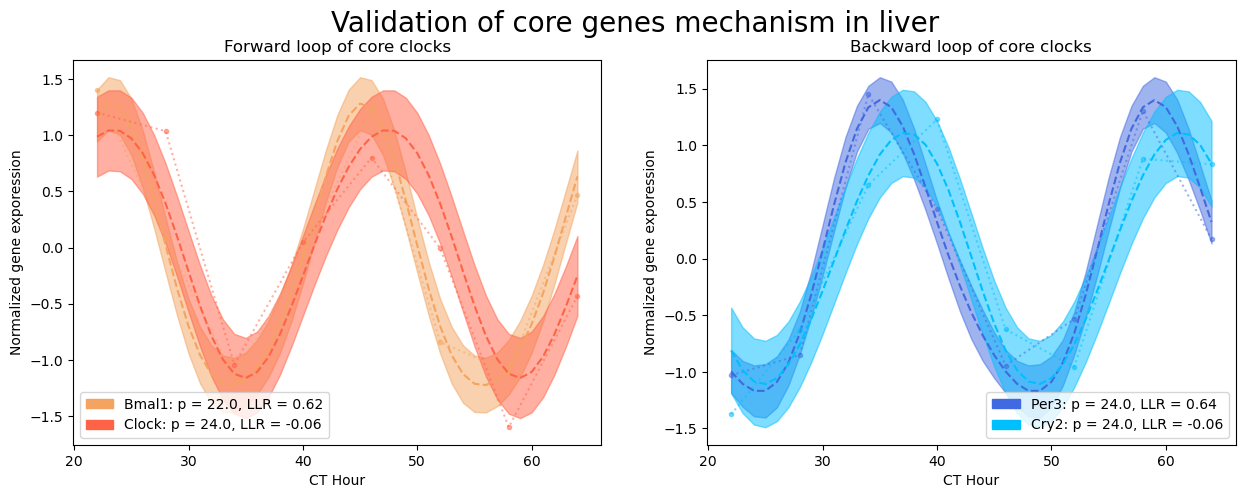

In [12]:
#Forward loops: BMAL1, CLOCK
#Backward loops: CRY2, Per1, Per3
# For Hrt
# Plot 1
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from core import *
from scipy.signal import find_peaks


plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)

color_plt = ['sandybrown','tomato','royalblue','deepskyblue']

for i in range(len(Liv_data_forward)):
    gene  = np.array(Liv_data_forward.iloc[i,1:], dtype = np.float32) #data.iloc[x,1:]
    x_torch = Array(np.arange(22,65,6)).to_tensor() 
    x_scale = Array(np.arange(22,65,1)).to_tensor() 

    t_torch = Array(gene.reshape(-1,1)).to_tensor()
    t_torch.norm()

    param_GP = Parameters()
    param_GP.p = Liv_plot_forward['Period'].values[i]
    param_GP.l = Liv_plot_forward['Lengthscale'].values[i]
    param_GP.sigma_f2 = Liv_plot_forward['Var'].values[i]
    param_GP.sigma_n2 = Liv_plot_forward['Noise'].values[i]

    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    final_pse.plot_f_gp(new_pse, color = color_plt[i])
    final_pse.plot_data(color = color_plt[i])

first_patch = mpatches.Patch(color='sandybrown',label= f'Bmal1: p = {Liv_plot_forward.Period.values[0]}, LLR = {round(Liv_res_forward.LLR.values[0],2)}')
second_patch = mpatches.Patch(color='tomato',label= f'Clock: p = {Liv_plot_forward.Period.values[1]}, LLR = {round(Liv_res_forward.LLR.values[1],2)}')
plt.legend(handles=[first_patch, second_patch])
plt.xlabel("CT Hour")
plt.ylabel("Normalized gene exporession")
plt.title('Forward loop of core clocks')
plt.subplot(1, 2, 2)

for j in range(len(Liv_data_backward)):
    gene  = np.array(Liv_data_backward.iloc[j,1:], dtype = np.float32) #data.iloc[x,1:]
    x_torch = Array(np.arange(22,65,6)).to_tensor() 
    x_scale = Array(np.arange(22,65,1)).to_tensor() 

    t_torch = Array(gene.reshape(-1,1)).to_tensor()
    t_torch.norm()

    param_GP = Parameters()
    param_GP.p = Liv_plot_backward['Period'].values[j]
    param_GP.l = Liv_plot_backward['Lengthscale'].values[j]
    param_GP.sigma_f2 = Liv_plot_backward['Var'].values[j]
    param_GP.sigma_n2 = Liv_plot_backward['Noise'].values[j]

    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    final_pse.plot_f_gp(new_pse, color = color_plt[2+j])
    final_pse.plot_data(color = color_plt[2+j])

first_patch = mpatches.Patch(color='royalblue',label= f'Per3: p = {Liv_plot_backward.Period.values[0]}, LLR = {round(Liv_res_backward.LLR.values[0],2)}')
second_patch = mpatches.Patch(color='deepskyblue',label= f'Cry2: p = {Liv_plot_backward.Period.values[1]}, LLR = {round(Liv_res_forward.LLR.values[1],2)}')
plt.legend(handles=[first_patch, second_patch])
plt.xlabel("CT Hour")
plt.ylabel("Normalized gene exporession")
plt.title('Backward loop of core clocks')
plt.suptitle("Validation of core genes mechanism in liver",fontsize=20)
#plt.savefig("Liv_clock.png")


In [ ]:
# Test with KO_WT

In [16]:
Liv_plot_forward = WT_plot[WT_plot['Gene_ID'].isin(['Arntl','Clock'])]
Liv_plot_backward = WT_plot[WT_plot['Gene_ID'].isin(['Per3','Cry2'])]
Liv_data_forward = WT_data[WT_data['Gene_ID'].isin(['Arntl','Clock'])]
Liv_data_backward = WT_data[WT_data['Gene_ID'].isin(['Per3','Cry2'])]
Liv_res_forward = WT[WT['Gene_ID'].isin(['Arntl','Clock'])]
Liv_res_backward = WT[WT['Gene_ID'].isin(['Per3','Cry2'])]

Text(0.5, 0.98, 'Validation of core genes mechanism in liver')

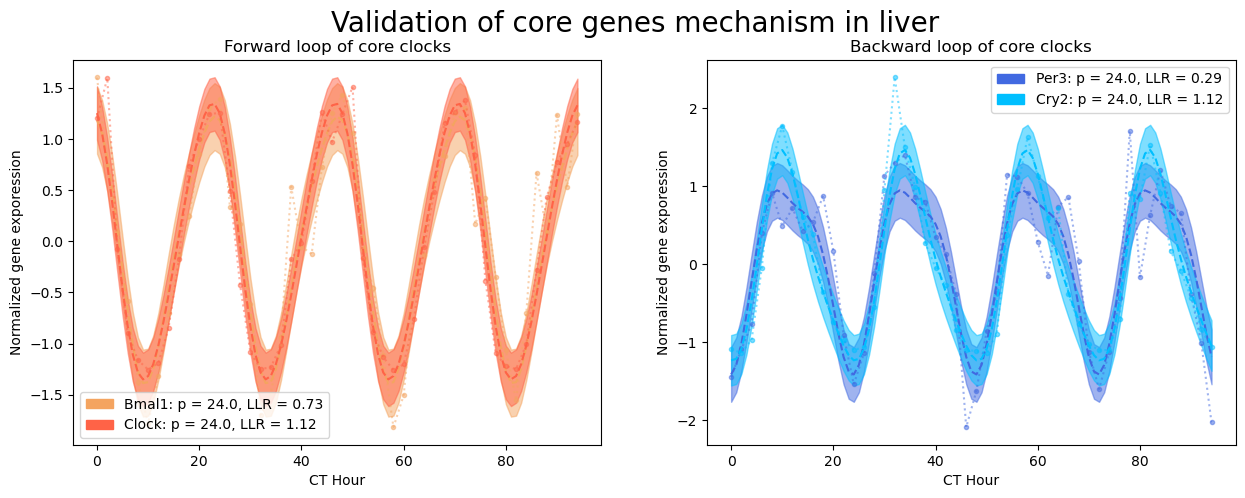

In [17]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from core import *
from scipy.signal import find_peaks


plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)

color_plt = ['sandybrown','tomato','royalblue','deepskyblue']

for i in range(len(Liv_data_forward)):
    gene  = np.array(Liv_data_forward.iloc[i,1:], dtype = np.float32) #data.iloc[x,1:]
    x_torch = Array(np.arange(0,95,2)).to_tensor() 
    x_scale = Array(np.arange(0,95,1)).to_tensor() 

    t_torch = Array(gene.reshape(-1,1)).to_tensor()
    t_torch.norm()

    param_GP = Parameters()
    param_GP.p = Liv_plot_forward['Period'].values[i]
    param_GP.l = Liv_plot_forward['Lengthscale'].values[i]
    param_GP.sigma_f2 = Liv_plot_forward['Var'].values[i]
    param_GP.sigma_n2 = Liv_plot_forward['Noise'].values[i]

    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    final_pse.plot_f_gp(new_pse, color = color_plt[i])
    final_pse.plot_data(color = color_plt[i])

first_patch = mpatches.Patch(color='sandybrown',label= f'Bmal1: p = {Liv_plot_forward.Period.values[0]}, LLR = {round(Liv_res_forward.LLR.values[0],2)}')
second_patch = mpatches.Patch(color='tomato',label= f'Clock: p = {Liv_plot_forward.Period.values[1]}, LLR = {round(Liv_res_forward.LLR.values[1],2)}')
plt.legend(handles=[first_patch, second_patch])
plt.xlabel("CT Hour")
plt.ylabel("Normalized gene exporession")
plt.title('Forward loop of core clocks')
plt.subplot(1, 2, 2)

for j in range(len(Liv_data_backward)):
    gene  = np.array(Liv_data_backward.iloc[j,1:], dtype = np.float32) #data.iloc[x,1:]
    x_torch = Array(np.arange(0,95,2)).to_tensor() 
    x_scale = Array(np.arange(0,95,1)).to_tensor() 

    t_torch = Array(gene.reshape(-1,1)).to_tensor()
    t_torch.norm()

    param_GP = Parameters()
    param_GP.p = Liv_plot_backward['Period'].values[j]
    param_GP.l = Liv_plot_backward['Lengthscale'].values[j]
    param_GP.sigma_f2 = Liv_plot_backward['Var'].values[j]
    param_GP.sigma_n2 = Liv_plot_backward['Noise'].values[j]

    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    final_pse.plot_f_gp(new_pse, color = color_plt[2+j])
    final_pse.plot_data(color = color_plt[2+j])

first_patch = mpatches.Patch(color='royalblue',label= f'Per3: p = {Liv_plot_backward.Period.values[0]}, LLR = {round(Liv_res_backward.LLR.values[0],2)}')
second_patch = mpatches.Patch(color='deepskyblue',label= f'Cry2: p = {Liv_plot_backward.Period.values[1]}, LLR = {round(Liv_res_forward.LLR.values[1],2)}')
plt.legend(handles=[first_patch, second_patch])
plt.xlabel("CT Hour")
plt.ylabel("Normalized gene exporession")
plt.title('Backward loop of core clocks')
plt.suptitle("Validation of core genes mechanism in liver",fontsize=20)

[21, 2, 2, 5, 24, 6, 7, 20, 22, 21, 3, 21]
[1, 2, 10, 3, 5, 6, 7, 0, 9, 11, 8, 4]


Text(0.5, 0.98, 'Clock gene expression over all organs')

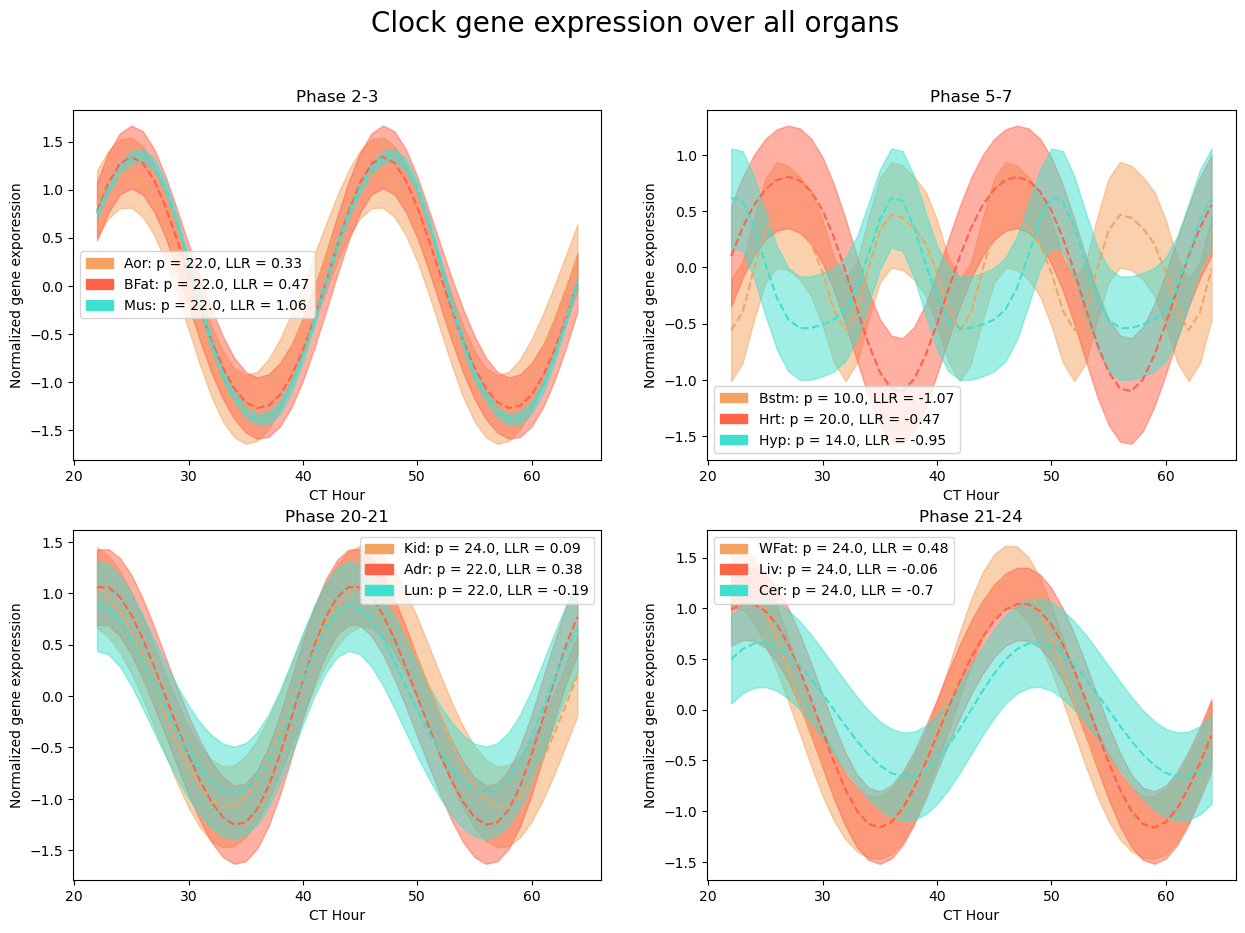

In [35]:
# Plot 2
# Pick a core gene Clock and plot it all over the organs
DATA = [Adr_data,Aor_data,BFat_data,Bstm_data,Cer_data,Hrt_data,Hyp_data,Kid_data,Liv_data,Lun_data,Mus_data,WFat_data]
PLOT = [Adr_plot,Aor_plot,BFat_plot,Bstm_plot,Cer_plot,Hrt_plot,Hyp_plot,Kid_plot,Liv_plot,Lun_plot,Mus_plot,WFat_plot]
label = ["Adr","Aor", "BFat", "Bstm", "Cer", "Hrt", "Hyp", "Kid", "Liv", "Lun", "Mus", "WFat"]
clock = [data[data['Gene.ID'] == 'Clock'].phase.values[0] for data in organs]
p     = [data[data['Gene.ID'] == 'Clock'].Period.values[0] for data in organs]
LLR   = [data[data['Gene.ID'] == 'Clock'].LLR.values[0] for data in organs]

sorted_idx = sorted(range(len(clock)), key=lambda k: clock[k])
print(clock)
print(sorted_idx)
plot_name = ['Phase 2-3','Phase 5-7','Phase 20-21','Phase 21-24']

plt.figure(figsize=(15,10))

for x in range(4):
    plt.subplot(2, 2, x+1)
    idx = [sorted_idx[3*x+0],sorted_idx[3*x+1],sorted_idx[3*x+2]]
    j = 0 
    color = ['sandybrown','tomato','turquoise']
    for i in idx:
        data = DATA[i]
        data = data[data['Gene.ID'] == 'Clock']
        plot = PLOT[i]
        plot = plot[plot['Gene.ID'] == 'Clock']
    
        gene  = np.array(data.iloc[0,1:], dtype = np.float32) #data.iloc[x,1:]
        x_torch = Array(np.arange(22,65,6)).to_tensor() 
        x_scale = Array(np.arange(22,65,1)).to_tensor() 

        t_torch = Array(gene.reshape(-1,1)).to_tensor()
        t_torch.norm()

        param_GP = Parameters()
        param_GP.p = plot['Period'].values[0]
        param_GP.l = plot['Lengthscale'].values[0]
        param_GP.sigma_f2 = plot['Var'].values[0]
        param_GP.sigma_n2 = plot['Noise'].values[0]

        final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
        new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
        final_pse.plot_f_gp(new_pse, color = color[j])
        j += 1
        
    first_patch = mpatches.Patch(color='sandybrown',label= f'{label[idx[0]]}: p = {p[idx[0]]}, LLR = {round(LLR[idx[0]],2)}')
    second_patch = mpatches.Patch(color='tomato',label= f'{label[idx[1]]}: p = {p[idx[1]]}, LLR = {round(LLR[idx[1]],2)}')
    third_patch = mpatches.Patch(color='turquoise',label= f'{label[idx[2]]}: p = {p[idx[2]]}, LLR = {round(LLR[idx[2]],2)}')
    plt.legend(handles=[first_patch, second_patch,third_patch])
    plt.xlabel("CT Hour")
    plt.ylabel("Normalized gene exporession")
    plt.title(plot_name[x])

plt.suptitle("Clock gene expression over all organs",fontsize=20)
#plt.savefig("Clock_organs.png")    


In [29]:
p     = [data[data['Gene.ID'] == 'Cry2'].Period.values[0] for data in organs]
p

[24.0, 22.0, 24.0, 22.0, 24.0, 22.0, 20.0, 24.0, 24.0, 24.0, 22.0, 14.0]

     Gene.ID    WFat_CT22    WFat_CT28  WFat_CT34    WFat_CT40    WFat_CT46  \
6818    Cry2  1216.310031  1277.519122   1691.696  1439.595835  1717.931244   

        WFat_CT52    WFat_CT58    WFat_CT64  
6818  1083.044733  1387.379594  1292.619504  
     Gene.ID  Period  Period_null  Lengthscale  Lengthscale_null       Var  \
6818    Cry2    14.0        300.0          2.0          8.365245  1.027135   

      Var_null     Noise  Noise_null  
6818      0.05  0.184748    0.907854  


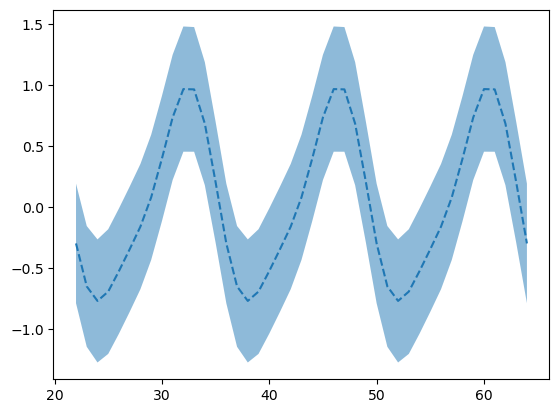

In [30]:
# Part 2: Rhythms in different organs
data = DATA[11]
data = data[data['Gene.ID'] == 'Cry2']
print(data)
plot = PLOT[11]
plot = plot[plot['Gene.ID'] == 'Cry2']
print(plot)


gene  = np.array(data.iloc[0,1:], dtype = np.float32) #data.iloc[x,1:]
x_torch = Array(np.arange(22,65,6)).to_tensor() 
x_scale = Array(np.arange(22,65,1)).to_tensor() 

t_torch = Array(gene.reshape(-1,1)).to_tensor()
t_torch.norm()

param_GP = Parameters()
param_GP.p = plot['Period'].values[0]
param_GP.l = plot['Lengthscale'].values[0]
param_GP.sigma_f2 = plot['Var'].values[0]
param_GP.sigma_n2 = plot['Noise'].values[0]

final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
final_pse.plot_f_gp(new_pse)
#final_pse.plot_data(new_pse)

In [39]:
#y_3 = []
#for i in organs:
#    y_3.append(len(i[(i.Period == 22) & (i.LLR > -1)])/len(i))
#df_3 = pd.DataFrame(
#   dict(
#      organs=label,
#      rel_freq=y_3
#   )
#)
#df_3 = df_3.reindex(data.index)
#df_3
#plt.plot(df_3['organs'].values.tolist(), df_3['rel_freq'],label='22h-periodicity')

Text(0.5, 0.98, 'Periodicity analysis on Atlas dataset')

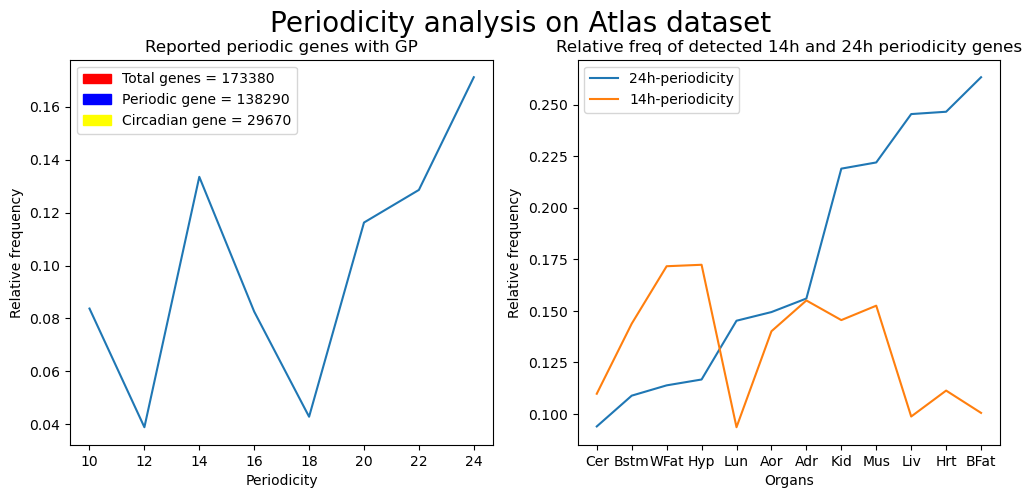

In [38]:
import matplotlib.patches as mpatches
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
signal = np.zeros(8)
label = ["Adr","Aor", "BFat", "Bstm", "Cer", "Hrt", "Hyp", "Kid", "Liv", "Lun", "Mus", "WFat"]
for i in range(len(organs)): 
    k = 0
    sys = organs[i]
    data = sys
    for j in range(10,25,2):
        signal[k] += (len(data[(data.Period == j) & (data.LLR > -1)]))
        k += 1
        

plt.plot([10,12,14,16,18,20,22,24],signal/sum([len(i) for i in organs]))
red_patch = mpatches.Patch(color='red',label= f'Total genes = {sum([len(i) for i in organs])}')
blue_patch = mpatches.Patch(color='blue', label= f'Periodic gene = {int(sum(signal))}')
yellow_patch = mpatches.Patch(color='yellow', label = f'Circadian gene = {int(signal[-1])}')
plt.legend(handles=[red_patch, blue_patch, yellow_patch])
plt.xlabel('Periodicity')
plt.ylabel('Relative frequency')
plt.title('Reported periodic genes with GP')

plt.subplot(1, 2, 2)
y = []
for i in organs:
    y.append(len(i[(i.Period == 24) & (i.LLR > -1)])/len(i))
df = pd.DataFrame(
   dict(
      organs=label,
      rel_freq=y
   )
)

data = df.sort_values('rel_freq')
plt.plot(data['organs'].values.tolist(), data['rel_freq'],label='24h-periodicity')

y_2 = []
for i in organs:
    y_2.append(len(i[(i.Period == 14) & (i.LLR > -1)])/len(i))
df_2 = pd.DataFrame(
   dict(
      organs=label,
      rel_freq=y_2
   )
)
df_2 = df_2.reindex(data.index)
df_2

plt.plot(df_2['organs'].values.tolist(), df_2['rel_freq'],label='14h-periodicity')
plt.legend()
plt.xlabel('Organs')
plt.ylabel('Relative frequency')
plt.title('Relative freq of detected 14h and 24h periodicity genes')
plt.suptitle("Periodicity analysis on Atlas dataset",fontsize=20)
#plt.savefig("Periodicity_analysis_Atlas.png") 

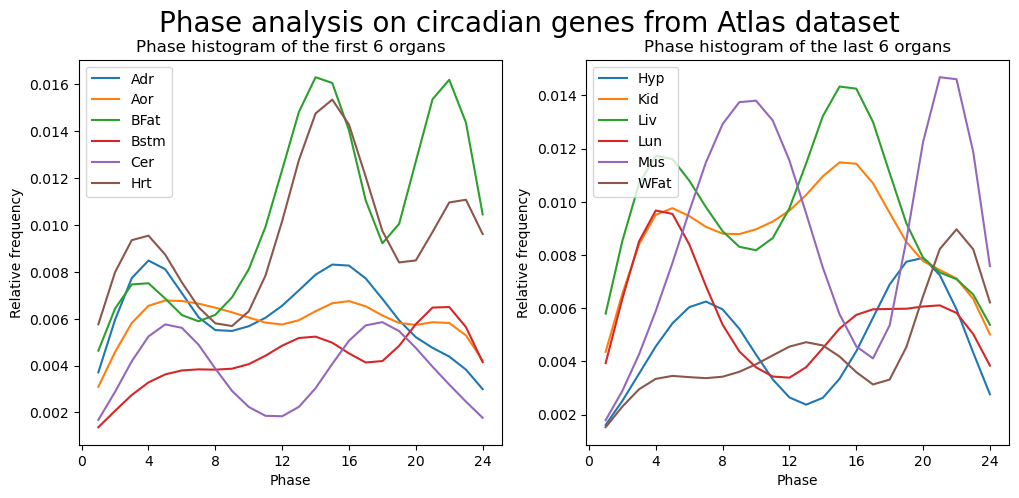

In [19]:
from scipy.signal import convolve
from scipy import signal

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

win = signal.windows.hann(10)
pk =[]
for i in [0,1,2,3,4,5]: 
    sys = organs[i]
    data = sys[(sys.Period == 24)&(sys.LLR > -1)]
    signal = []
    for j in range(1,25):
        signal.append(len(data[data.phase == j].index.values)/len(sys))
    
    #peaks, _ = find_peaks(signal,distance = 10)
    #pk.append(peaks + 1)
    plt.plot(range(1,25),convolve(signal, win, mode='same') / sum(win),label = label[i])
    

plt.legend()
plt.xticks([0,4,8,12,16,20,24])
plt.xlabel('Phase')
plt.ylabel('Relative frequency')
plt.title('Phase histogram of the first 6 organs')

plt.subplot(1,2,2)
for i in [6,7,8,9,10,11]: 
    sys = organs[i]
    data = sys[(sys.Period == 24)&(sys.LLR >-1)]
    signal = []
    for j in range(1,25):
        signal.append(len(data[data.phase == j].index.values)/len(sys))
    
    #peaks, _ = find_peaks(signal,distance = 10)
    #pk.append(peaks + 1)
    plt.plot(range(1,25),convolve(signal, win, mode='same') / sum(win),label = label[i])
    

plt.legend()
plt.xticks([0,4,8,12,16,20,24])
plt.xlabel('Phase')
plt.ylabel('Relative frequency')
plt.title('Phase histogram of the last 6 organs')

plt.suptitle("Phase analysis on circadian genes from Atlas dataset",fontsize=20)
plt.savefig("Phase_analysis_Atlas.png") 

Text(0.5, 0.98, 'Phase analysis on circadian genes from Atlas dataset')

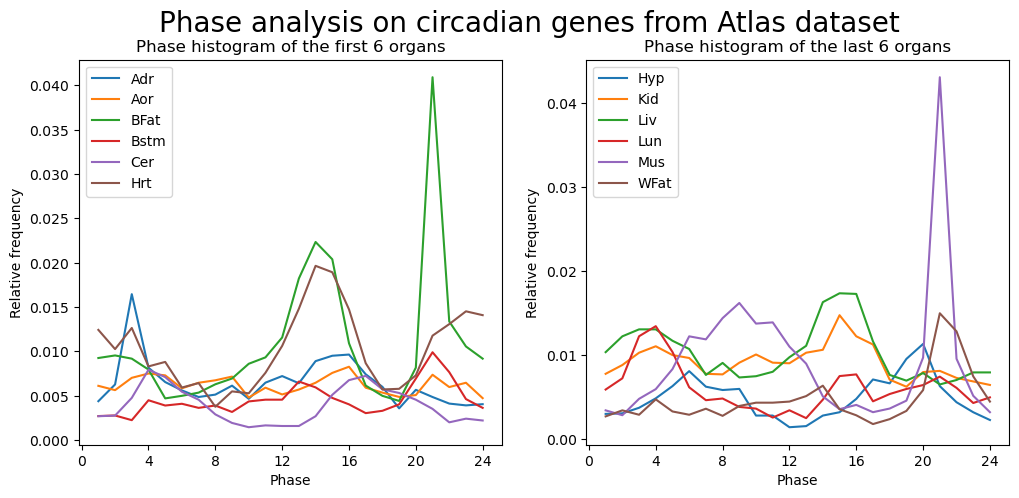

In [43]:
from scipy.signal import convolve
from scipy import signal

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

win = signal.windows.hann(10)
pk =[]
for i in [0,1,2,3,4,5]: 
    sys = organs[i]
    data = sys[(sys.Period == 24)&(sys.LLR > -1)]
    signal = []
    for j in range(1,25):
        signal.append(len(data[data.phase == j].index.values)/len(sys))
    
    #peaks, _ = find_peaks(signal,distance = 10)
    #pk.append(peaks + 1)
    plt.plot(range(1,25),signal,label = label[i])
    

plt.legend()
plt.xticks([0,4,8,12,16,20,24])
plt.xlabel('Phase')
plt.ylabel('Relative frequency')
plt.title('Phase histogram of the first 6 organs')

plt.subplot(1,2,2)
for i in [6,7,8,9,10,11]: 
    sys = organs[i]
    data = sys[(sys.Period == 24)&(sys.LLR >-1)]
    signal = []
    for j in range(1,25):
        signal.append(len(data[data.phase == j].index.values)/len(sys))
    
    #peaks, _ = find_peaks(signal,distance = 10)
    #pk.append(peaks + 1)
    plt.plot(range(1,25),signal,label = label[i])
    

plt.legend()
plt.xticks([0,4,8,12,16,20,24])
plt.xlabel('Phase')
plt.ylabel('Relative frequency')
plt.title('Phase histogram of the last 6 organs')

plt.suptitle("Phase analysis on circadian genes from Atlas dataset",fontsize=20)

In [ ]:
circadian = []
for k in organs:
    circadian.append(k[(k.LLR > -1)& (k.Period == 24)])

table = []
for a in range(len(circadian)):
    for b in range(len(circadian)):
        #print('Shared circadian genes between '+label[a]+' and '+label[b]+' are:')
        x = circadian[a]
        y = circadian[b]
        list_1 = x['Gene.ID'].values
        list_2 = y['Gene.ID'].values
        similar = np.intersect1d(list_1, list_2)
        #table.append(len(similar)) 
        table.append(len(similar)/len(x))
        print(similar)
        print('Total: ',len(similar))
        print('-----')

In [21]:
#final_table = np.array(table).reshape((12, 12))
df = pd.DataFrame(np.array(table).reshape((12, 12)), index=label, columns=label)
df.style.background_gradient(cmap='Blues')

,Adr,Aor,BFat,Bstm,Cer,Hrt,Hyp,Kid,Liv,Lun,Mus,WFat
Adr,1.000000,0.183824,0.256488,0.104671,0.102941,0.222751,0.118945,0.243512,0.231834,0.151817,0.197664,0.124567
Aor,0.197766,0.999535,0.301070,0.119591,0.105165,0.259190,0.113541,0.251745,0.263844,0.166589,0.211726,0.150302
BFat,0.162823,0.177650,1.000000,0.112301,0.084294,0.255354,0.118342,0.214443,0.218561,0.141406,0.225151,0.118067
Bstm,0.146845,0.155947,0.248180,1.000000,0.130461,0.241505,0.194782,0.197209,0.192961,0.153519,0.196602,0.113471
Cer,0.174871,0.166054,0.225569,0.157972,1.000000,0.235121,0.172667,0.227774,0.219691,0.168259,0.216752,0.113887
Hrt,0.150894,0.163200,0.272488,0.116613,0.093759,1.000000,0.117785,0.225608,0.245825,0.144155,0.218576,0.129212
Hyp,0.155896,0.138322,0.244331,0.181973,0.133220,0.227891,1.000000,0.215986,0.212018,0.138889,0.173469,0.100340
Kid,0.179471,0.172458,0.248964,0.103602,0.098821,0.245457,0.121454,1.000000,0.268728,0.175646,0.214217,0.126873
Liv,0.164619,0.174140,0.244472,0.097666,0.091830,0.257678,0.114865,0.258907,1.000000,0.146806,0.207310,0.123157
Lun,0.161454,0.164673,0.236891,0.116375,0.105336,0.226311,0.112695,0.253450,0.219871,1.000000,0.235971,0.127415


In [42]:
#print(425/2148)
#print(425/2312)

#print(593/3642) # over that organ total gene
print(138290/173380) # over the look up genes
print(29670/173380)

0.7976121813357943
0.17112700426808167


In [23]:
from IPython.display import display
#import dataframe_image as dfi

mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True
df[mask] = np.nan
(df
 .style
 .background_gradient(cmap='Dark2_r', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

,Adr,Aor,BFat,Bstm,Cer,Hrt,Hyp,Kid,Liv,Lun,Mus,WFat
Adr,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Aor,0.20,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
BFat,0.16,0.18,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bstm,0.15,0.16,0.25,nan,nan,nan,nan,nan,nan,nan,nan,nan
Cer,0.17,0.17,0.23,0.16,nan,nan,nan,nan,nan,nan,nan,nan
Hrt,0.15,0.16,0.27,0.12,0.09,nan,nan,nan,nan,nan,nan,nan
Hyp,0.16,0.14,0.24,0.18,0.13,0.23,nan,nan,nan,nan,nan,nan
Kid,0.18,0.17,0.25,0.10,0.10,0.25,0.12,nan,nan,nan,nan,nan
Liv,0.16,0.17,0.24,0.10,0.09,0.26,0.11,0.26,nan,nan,nan,nan
Lun,0.16,0.16,0.24,0.12,0.11,0.23,0.11,0.25,0.22,nan,nan,nan


In [51]:
# Organ specific?
ID_compare = []
for j in organs:
    refine = j[(j.Period == 24)&(j.LLR >-1)]
    ID = list(refine['Gene.ID'].values)
    ID_compare.append(ID)

ID_unique = []
for i in range(len(ID_compare)):
    start = ID_compare[i]
    for j in range(len(ID_compare)):
        last = ID_compare[j]
        if i != j:
            start = [x for x in start if x not in last]
            #print(len(start))
    ID_unique.append(start)
    #print('--------------------')

Text(0.5, 1.0, 'Rank of organ specific circadian genes')

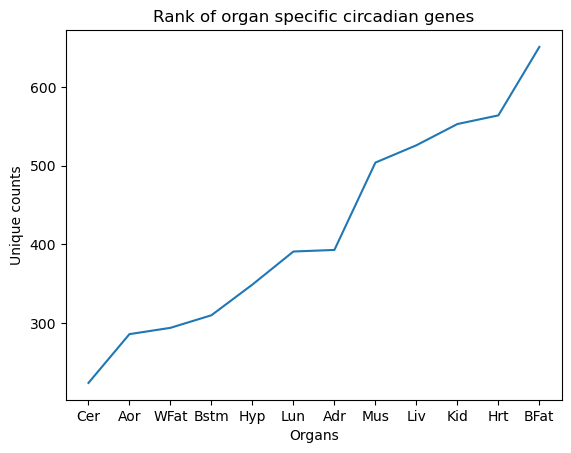

In [52]:
df_10 = pd.DataFrame(
   dict(
      organs=label,
      unique=[len(x) for x in ID_unique]
   )
)

df_10 = df_10.sort_values('unique')
plt.plot(df_10['organs'], df_10['unique'])
plt.xlabel('Organs')
plt.ylabel('Unique counts')
plt.title('Rank of organ specific circadian genes')

In [53]:
from functools import reduce
from collections import Counter
circa_genes = [j['Gene.ID'].values for j in circadian]
out = np.concatenate(circa_genes).ravel()
rank = Counter(out)
rank.most_common(30)

[('Cry1', 10),
 ('Ahsa1', 10),
 ('P4ha1', 10),
 ('Cirbp', 10),
 ('Dnajb1', 10),
 ('P4ha2', 10),
 ('Bmal1', 10),
 ('Stip1', 9),
 ('Mid1ip1', 9),
 ('Wipi1', 9),
 ('Gm5844', 9),
 ('Hsph1', 9),
 ('Gm15542', 9),
 ('Hspb1', 9),
 ('Npas2', 9),
 ('Rorc', 8),
 ('Sytl2', 8),
 ('Tspan4', 8),
 ('Gm20634', 8),
 ('Hsp90aa1', 8),
 ('Manf', 8),
 ('Nfya', 8),
 ('Wee1', 8),
 ('Vgll3', 8),
 ('Fmo2', 8),
 ('Bicd2', 8),
 ('Nfil3', 8),
 ('Naa60', 8),
 ('H3f3b', 8),
 ('Tubd1', 8)]

In [ ]:
# Maybe 22h vs 24h?

In [ ]:
KO[KO['Period']]

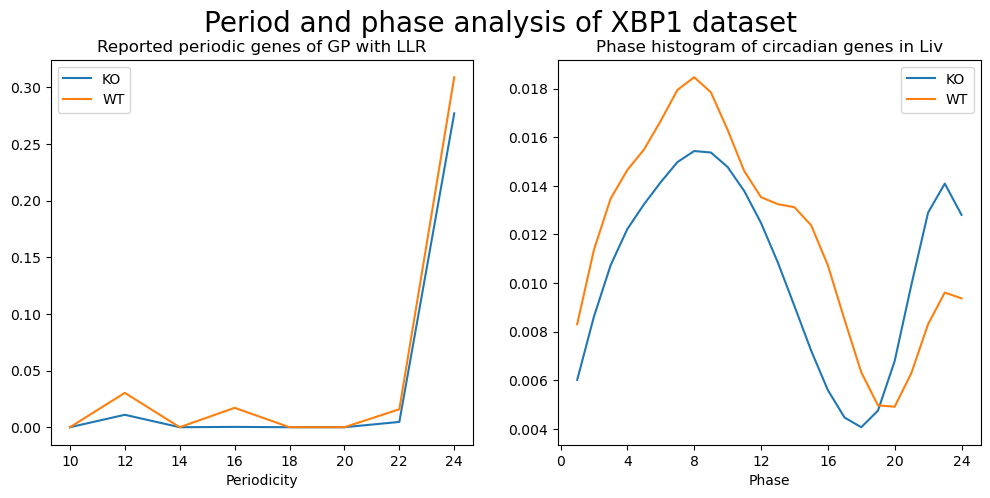

In [9]:
from scipy.signal import convolve
from scipy import signal
# Heathy vs Disease:
xbp = [KO,WT]
name = ['KO','WT']
res = np.zeros(8)

plt.figure(figsize=(12,5))
    
plt.subplot(1,2,1)
for i in range(len(xbp)): 
    k = 0
    sys = xbp[i]
    data = sys
    res = np.zeros(8)
    for j in range(10,25,2):
        res[k] += (len(data[(data.Period == j)&(data.LLR > -1)])) #& 
        k += 1
    plt.plot([10,12,14,16,18,20,22,24],res/len(sys), label = name[i])

#red_patch = mpatches.Patch(color='red',label= f'Total genes = {sum([len(i) for i in organs])}')
#blue_patch = mpatches.Patch(color='blue', label= f'Periodic gene = {int(sum(signal))}')
#yellow_patch = mpatches.Patch(color='yellow', label = f'Circadian gene = {int(signal[-1])}')
#plt.legend(handles=[red_patch, blue_patch, yellow_patch])
plt.legend()
plt.xlabel('Periodicity')
plt.title('Reported periodic genes of GP with LLR')

plt.subplot(1,2,2)
win = signal.windows.hann(10)
pk =[]
for i in [0,1]: 
    sys = xbp[i]
    data = sys[(sys.Period == 24)&(sys.LLR > -1)]
    signal = []
    for j in range(1,25):
        signal.append(len(data[data.phase == j].index.values)/len(sys))
    
    #peaks, _ = find_peaks(signal,distance = 10)
    #pk.append(peaks + 1)
    plt.plot(range(1,25),convolve(signal, win, mode='same') / sum(win),label = name[i])
    

plt.legend()
plt.xticks([0,4,8,12,16,20,24])
plt.xlabel('Phase')
plt.title('Phase histogram of circadian genes in Liv')
plt.suptitle('Period and phase analysis of XBP1 dataset', fontsize =20)
plt.savefig("new_P_analysis_XBP1_fixed.png")

Text(0.5, 0.98, 'Histogram of LLR distribution for 12h periodicity patterns in KO and WT dataset')

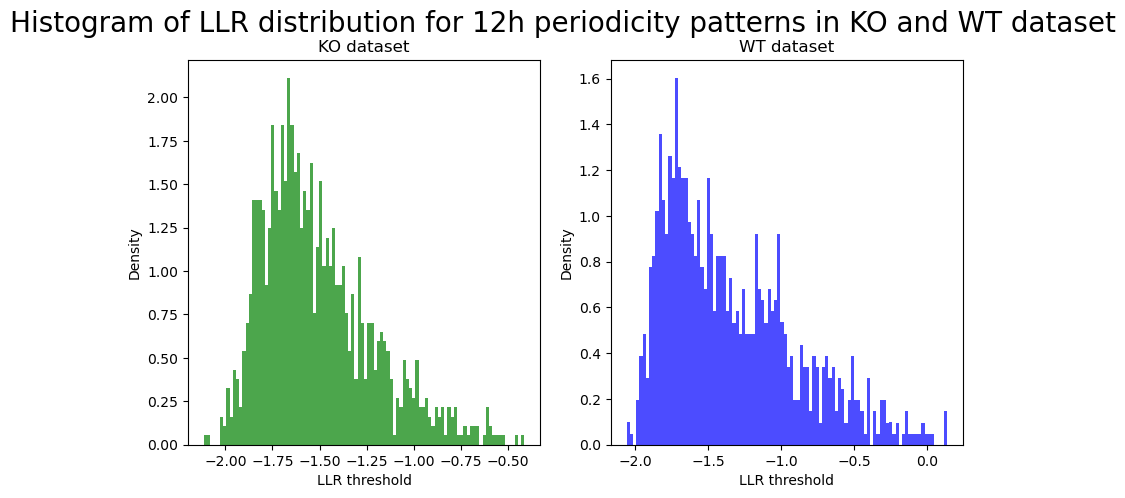

In [7]:
xbp = [KO,WT]
circadian_2 = []
for k in xbp:
    circadian_2.append(k[(k.Period == 12)])


num_bins = 100

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#circadian_2[0].hist(column='LLR')
n, bins, patches = plt.hist(circadian_2[0]['LLR'], num_bins,density = 1,color ='green',alpha = 0.7)
plt.xlabel("LLR threshold")
plt.ylabel("Density")
plt.title("KO dataset")

plt.subplot(1, 2, 2)
#circadian_2[1].hist(column='LLR')
n, bins, patches = plt.hist(circadian_2[1]['LLR'], num_bins,density = 1,color ='blue',alpha = 0.7)
plt.xlabel("LLR threshold")
plt.ylabel("Density")
plt.title("WT dataset")

plt.suptitle("Histogram of LLR distribution for 12h periodicity patterns in KO and WT dataset",fontsize=20)
#plt.savefig("Hist_12.png")

In [ ]:
#2 Rows of 12h vs 24h rhythms (retained)
# Show 1 case of enhanced + 1 case of disrupted

In [102]:
# Show comparision with a pie chart on Disrupt/Retain/Enhanced respectively for 12 and 24h

Text(0.5, 0.98, 'Gene conditions between circadian and 12h periodicity patterns')

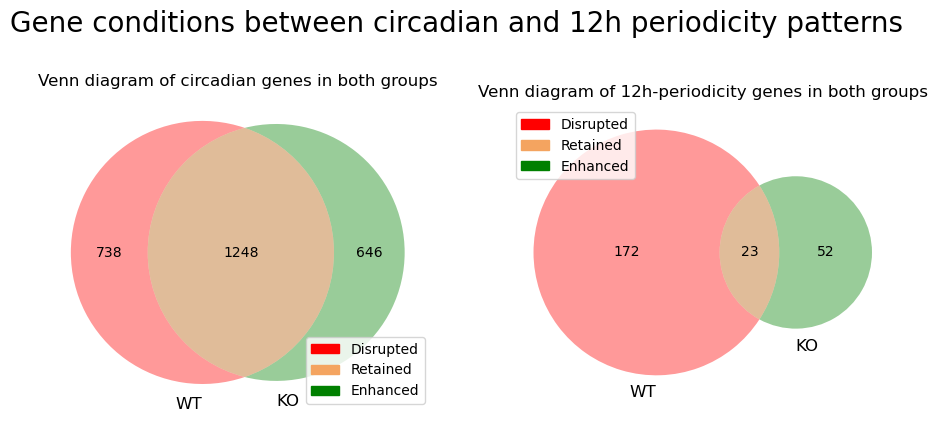

In [8]:
from matplotlib_venn import venn2

plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
xbp = [KO,WT]
circadian_2 = []
for k in xbp:
    circadian_2.append(k[(k.Period == 24)&(k.LLR >-1)])
x = circadian_2[0]
y = circadian_2[1]

start = list(y['Gene_ID'])
last = list(x['Gene_ID'])
WT_unique = [i for i in start if i not in last]  # enhanced, 'Slc19a2' as example
KO_unique = [i for i in last if i not in start]  
similar = np.intersect1d(start, last)

venn2(subsets = (len(WT_unique), len(KO_unique), len(similar)), set_labels = ('WT', 'KO'))
first_patch = mpatches.Patch(color='r',label= f'Disrupted')
second_patch = mpatches.Patch(color='sandybrown',label= f'Retained')
third_patch = mpatches.Patch(color='g',label= f'Enhanced')
plt.legend(handles=[first_patch, second_patch, third_patch], loc = "lower right")
plt.title('Venn diagram of circadian genes in both groups')

plt.subplot(1,2,2)
circadian_2 = []
for k in xbp:
    circadian_2.append(k[(k.Period == 12)&(k.LLR >-1)])
x = circadian_2[0]
y = circadian_2[1]

start = list(y['Gene_ID'])
last = list(x['Gene_ID'])
WT_unique = [i for i in start if i not in last]  # enhanced, 'Slc19a2' as example
KO_unique = [i for i in last if i not in start]  
similar = np.intersect1d(start, last)

venn2(subsets = (len(WT_unique), len(KO_unique), len(similar)), set_labels = ('WT', 'KO'))
first_patch = mpatches.Patch(color='r',label= f'Disrupted')
second_patch = mpatches.Patch(color='sandybrown',label= f'Retained')
third_patch = mpatches.Patch(color='g',label= f'Enhanced')
plt.legend(handles=[first_patch, second_patch, third_patch], loc = "upper left")
plt.title('Venn diagram of 12h-periodicity genes in both groups')

plt.suptitle("Gene conditions between circadian and 12h periodicity patterns",fontsize=20)
#plt.savefig("Venn_12vs24.png")

In [10]:
circadian_2 = []
for k in xbp:
    circadian_2.append(k[(k.Period == 24)&(k.LLR >-1)])
x = circadian_2[0]
y = circadian_2[1]

start = list(y['Gene_ID'])
last = list(x['Gene_ID'])
WT_unique = [i for i in start if i not in last]  # enhanced, 'Slc19a2' as example
KO_unique = [i for i in last if i not in start]  
similar = np.intersect1d(start, last)


array(['0610005C13Rik', '0610030E20Rik', '0610040J01Rik', ..., 'Zscan26',
       'Zswim8', 'Zwint'], dtype='<U13')

In [16]:
print(*KO_unique,sep = ", ")

Lmbrd1, Uggt1, Cox5b, Acadl, Tns1, Arpc2, Stk16, Ptma, Ugt1a1, Ubxn4, Ivns1abp, Qsox1, Fam20b, Rabgap1l, Prdx6, Slc19a2, Apcs, Irf6, Pter, Abca2, Fnbp1, Cutal, Hc, Dennd1a, Cobll1, Atf2, Zc3h15, Nr1h3, Fbxo3, Cd59a, Pdia3, Sqor, Slc27a2, Snrnp200, Cenpb, Prnp, Sec23b, Cpne1, Zfp335, Zmynd8, Pck1, Osbpl2, Cables2, Tpd52l2, Cyp7b1, Cp, Acad9, Kpna4, Ppid, Cct3, Hax1, Selenbp1, Mrps21, Sec22b, Hsd3b5, Atp1a1, Sars, Cnn3, Bcar3, Hadh, Adh1, Ddah1, Acadm, Tmem64, Decr1, Ufl1, Slc25a51, Tdrd7, Rnf20, Pgm1, Ak4, C8a, Pcsk9, Txndc12, Rnf11, Eri3, Smap2, Akirin1, Bsdc1, Ahdc1, Wasf2, Cep85, Mtfr1l, Eloa, Pink1, Sdhb, Mtor, Rere, Tprgl, Nadk, Cyp51, Gsap, Abcb8, Eif2b4, Add1, Htt, Pds5a, Slc30a9, Ociad1, Ugt2a3, Slc4a4, Lrrc8d, Ankle2, Fbrsl1, Pxn, Erp29, Acad10, Hpd, Atp6v0a2, Scarb1, Ran, Cldn3, Ywhag, Gigyf1, Ints1, Trrap, Casd1, Slc25a13, Tmem106b, Klhdc10, Cul1, Rarres2, Mpp6, Tax1bp1, Znrf2, Abcg2, Thnsl2, Polr1a, Mat2a, Mogs, Rpn1, Itpr1, Cxcl12, Slc6a13, Phb2, Chd4, Plekha5, Rassf8, Itpr

In [15]:
print(*WT_unique,sep = ", ")

Pcmtd1, Cops5, Kansl3, Coa5, Slc40a1, Aox3, Clk1, Tmbim1, Retreg2, Atg9a, Dnajb2, Dnpep, Farsb, Scly, Phlpp1, Dbi, Dars, Pfkfb2, Eif2d, Plekha6, Zc3h11a, Adipor1, Rnpep, Nr5a2, Acbd6, Cep350, Cop1, Zbtb37, Fh1, Hnrnpu, Mia3, Slc30a1, Prpf18, Optn, Rbm17, Mindy3, Dnajc1, Abi1, Acbd5, Ehmt1, Vav2, Rxra, Gle1, Endog, Tor1b, Abl1, Cdk9, Fbxw2, Psmb7, Psmd14, Rapgef4, Tmx2, Zdhhc5, Celf1, Psmc3, Madd, Cd82, Hsd17b12, Cat, Chp1, Cops2, Stard7, Rrbp1, Xrn2, Rbck1, Itch, Acss2, Eif6, Rab5if, Tgm2, Top1, Plcg1, Srsf6, Hnf4a, Rnf114, Cebpb, Ptpn1, Psma7, Adrm1, Ppdpf, Zfp512b, Car3, Fxr1, Larp1b, Pgrmc2, Eif2a, Tdo2, Fgg, Fgb, Sh3d19, Lmna, Pmvk, Slc39a1, Psmb4, Arnt, Mov10, Gstm6, Gstm2, Gstm1, Ampd2, Psma5, Tmem167b, Ube2d3, Adh6-ps1, Metap1, Zzz3, Cth, Otud6b, Ube2j1, Orc3, Topors, Dnaja1, Ube2r2, Rgp1, Npr2, Gne, Aldob, Nipsnap3b, Tmem38b, Rad23b, Fkbp15, Slc31a1, Tle1, Rraga, Slc35d1, Prkaa2, Dio1, Faah, Gpbp1l1, Psmb2, Ptp4a2, Syf2, Hmgcl, Id3, Hp1bp3, Mul1, Camk2n1, Plod1, Pgd, Ube4b, Eno

In [13]:
print(*similar,sep = ", ")

0610005C13Rik, 0610030E20Rik, 0610040J01Rik, 1600014C10Rik, 1700017B05Rik, 1810013L24Rik, 1810055G02Rik, 1810058I24Rik, 2310022B05Rik, 2810459M11Rik, 2900026A02Rik, 4932438A13Rik, 5031439G07Rik, AI182371, AI661453, AU022252, Aasdhppt, Abca6, Abca8b, Abcb11, Abcc2, Abcc6, Abcf1, Abcg5, Abcg8, Abhd6, Ablim3, Abtb1, Abtb2, Acaa1a, Acad11, Acat3, Acbd4, Acin1, Acmsd, Acnat1, Acnat2, Aco1, Acot1, Acot12, Acot7, Acox2, Acp6, Acsl1, Acsl4, Acsm5, Actb, Actn4, Adap2, Adarb1, Adck5, Adcy6, Adcy9, Adh4, Adora1, Adra1b, Afg3l2, Afmid, Agmat, Agpat2, Agtr1a, Agxt, Ahctf1, Ahcy, Aifm2, Aimp1, Ak2, Akap13, Akr1c12, Akr1c13, Akt1, Alas1, Albfm1, Aldh16a1, Aldh8a1, Alg11, Alkbh3, Als2, Als2cl, Amd1, Amdhd1, Amt, Anapc2, Angel2, Angptl2, Angptl8, Ank, Ankrd13a, Anks1, Anp32a, Anxa7, Aox1, Ap2a2, Ap3b1, Ap3m1, Ap3s1, Appl2, Aqp11, Aqp8, Aqp9, Arap1, Arfgap2, Arhgap12, Arhgap21, Arhgap35, Arhgef19, Arhgef26, Arntl, Arrdc3, Arsa, Arsg, Asb13, Asl, Aspg, Atat1, Atf4, Atf5, Atf6b, Atg101, Atg13, Atg14, Atg2

In [18]:
KO[KO.Gene_ID == 'Arntl']

,Gene_ID,Period,SNR,nSNR,LLR,phase
5581,Arntl,24.0,6.404545,2.488198,1.342559,23


In [19]:
WT[WT.Gene_ID == 'Arntl']

,Gene_ID,Period,SNR,nSNR,LLR,phase
5674,Arntl,24.0,6.091338,2.175544,1.123497,23


In [20]:
WT[WT.Gene_ID == 'Clock']

,Gene_ID,Period,SNR,nSNR,LLR,phase
4391,Clock,24.0,5.933658,1.95587,0.732367,23


In [22]:
KO[KO.Gene_ID == 'Clock']

,Gene_ID,Period,SNR,nSNR,LLR,phase
1249,Clock,24.0,3.198513,1.268887,0.801679,22


In [24]:
KO[KO.Gene_ID == 'Per3']

,Gene_ID,Period,SNR,nSNR,LLR,phase
4812,Per3,24.0,4.500253,1.834746,1.036597,10


In [23]:
WT[WT.Gene_ID == 'Per3']

,Gene_ID,Period,SNR,nSNR,LLR,phase
4477,Per3,24.0,4.655176,1.917386,0.924286,10


In [49]:
KO[KO.Gene_ID == 'Slc35d2']

,Gene_ID,Period,SNR,nSNR,LLR,phase
4732,Slc35d2,18.0,1.882062,0.802709,-1.753751,18


In [50]:
WT[WT.Gene_ID == 'Slc35d2']

,Gene_ID,Period,SNR,nSNR,LLR,phase
3180,Slc35d2,24.0,2.963333,1.065181,-0.318661,4


In [6]:
KO_plot = pd.orcead_csv('./06_XBP1_result/KO/plot_KO.csv')
KO_plot = KO_plot.iloc[:,1:]
KO_plot_supp = pd.read_csv('./06_XBP1_result/KO/plot_KO_supp.csv')
KO_plot_supp = KO_plot_supp.iloc[:,1:]
KO_plot = pd.concat([KO_plot,KO_plot_supp], axis=0, ignore_index = True)

WT_plot = pd.read_csv('./06_XBP1_result/WT/plot_WT.csv')
WT_plot = WT_plot.iloc[:,1:]
WT_plot_supp = pd.read_csv('./06_XBP1_result/WT/plot_WT_supp.csv')
WT_plot_supp = WT_plot_supp.iloc[:,1:]
WT_plot = pd.concat([WT_plot,WT_plot_supp], axis=0, ignore_index = True)

KO_data = pd.read_csv('./results/STAR/KO_arrange.csv')
KO_data_supp = pd.read_csv('./results/STAR/KO_supp.csv')
KO_data = pd.concat([KO_data,KO_data_supp], axis=0, ignore_index = True)

WT_data = pd.read_csv('./results/STAR/WT_arrange.csv')
WT_data_supp = pd.read_csv('./results/STAR/WT_supp.csv')
WT_data = pd.concat([WT_data,WT_data_supp], axis=0, ignore_index = True)

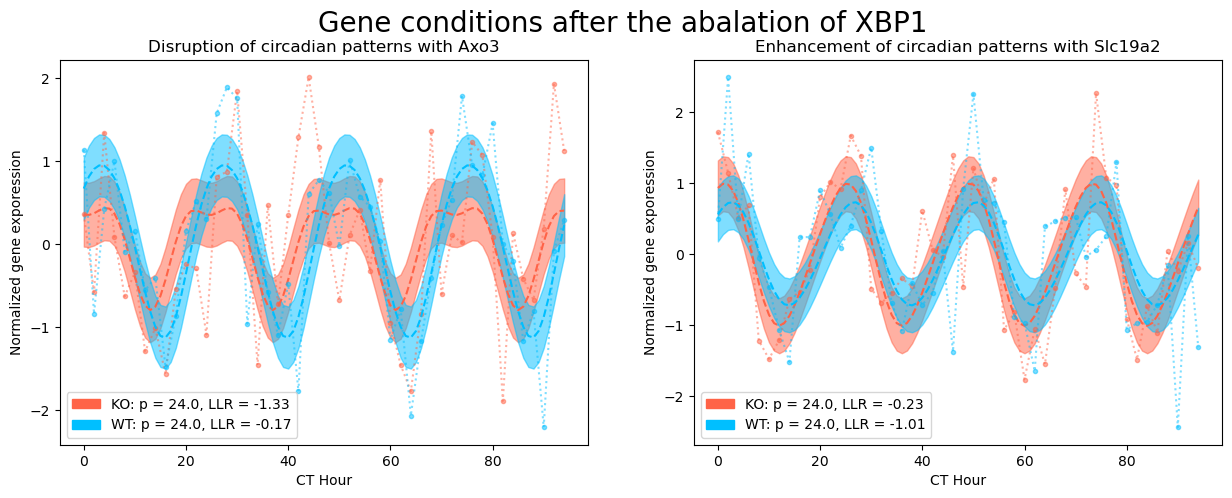

In [158]:
disrupt_plot = [KO_plot[KO_plot['Gene_ID'] == 'Aox3'], WT_plot[WT_plot['Gene_ID'] == 'Aox3']]
enhance_plot = [KO_plot[KO_plot['Gene_ID'] == 'Slc19a2'], WT_plot[WT_plot['Gene_ID'] == 'Slc19a2']]

disrupt_data= [KO_data[KO_data['Gene_ID'] == 'Aox3'], WT_data[WT_data['Gene_ID'] == 'Aox3']]
enhance_data = [KO_data[KO_data['Gene_ID'] == 'Slc19a2'], WT_data[WT_data['Gene_ID'] == 'Slc19a2']]

disrupt = [KO[KO['Gene_ID'] == 'Aox3'], WT[WT['Gene_ID'] == 'Aox3']]
enhance = [KO[KO['Gene_ID'] == 'Slc19a2'], WT[WT['Gene_ID'] == 'Slc19a2']]


plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)

color_plt = ['tomato','deepskyblue','tomato','deepskyblue']

for i in range(len(disrupt)):
    gene  = np.array(disrupt_data[i].iloc[:,1:], dtype = np.float32) #data.iloc[x,1:]
    x_torch = Array(np.arange(0,95,2)).to_tensor() 
    x_scale = Array(np.arange(0,95,1)).to_tensor() 

    t_torch = Array(gene.reshape(-1,1)).to_tensor()
    t_torch.norm()

    param_GP = Parameters()
    param_GP.p = disrupt_plot[i]['Period'].values[0]
    param_GP.l = disrupt_plot[i]['Lengthscale'].values[0]
    param_GP.sigma_f2 = disrupt_plot[i]['Var'].values[0]
    param_GP.sigma_n2 = disrupt_plot[i]['Noise'].values[0]

    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    final_pse.plot_f_gp(new_pse, color = color_plt[i])
    final_pse.plot_data(color = color_plt[i])

p_1 = disrupt_plot[0]['Period'].values[0]
p_2 = disrupt_plot[1]['Period'].values[0]
LLR_1 = round(disrupt[0].LLR.values[0],2)
LLR_2 = round(disrupt[1].LLR.values[0],2)
first_patch = mpatches.Patch(color='tomato',label= f'KO: p = {p_1}, LLR = {LLR_1}')
second_patch = mpatches.Patch(color='deepskyblue',label= f'WT: p = {p_2}, LLR = {LLR_2}')
plt.legend(handles=[first_patch, second_patch])
plt.xlabel("CT Hour")
plt.ylabel("Normalized gene exporession")
plt.title('Disruption of circadian patterns with Axo3')
plt.subplot(1, 2, 2)

for j in range(len(enhance)):
    gene  = np.array(enhance_data[j].iloc[:,1:], dtype = np.float32) #data.iloc[x,1:]
    x_torch = Array(np.arange(0,95,2)).to_tensor() 
    x_scale = Array(np.arange(0,95,1)).to_tensor() 

    t_torch = Array(gene.reshape(-1,1)).to_tensor()
    t_torch.norm()

    param_GP = Parameters()
    param_GP.p = enhance_plot[j]['Period'].values[0]
    param_GP.l = enhance_plot[j]['Lengthscale'].values[0]
    param_GP.sigma_f2 = enhance_plot[j]['Var'].values[0]
    param_GP.sigma_n2 = enhance_plot[j]['Noise'].values[0]

    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    final_pse.plot_f_gp(new_pse, color = color_plt[2+j])
    final_pse.plot_data(color = color_plt[2+j])

p_1 = enhance_plot[0]['Period'].values[0]
p_2 = enhance_plot[1]['Period'].values[0]
LLR_1 = round(enhance[0].LLR.values[0],2)
LLR_2 = round(enhance[1].LLR.values[0],2)

first_patch = mpatches.Patch(color='tomato',label= f'KO: p = {p_1}, LLR = {LLR_1}')
second_patch = mpatches.Patch(color='deepskyblue',label= f'WT: p = {p_2}, LLR = {LLR_2}')
plt.legend(handles=[first_patch, second_patch])
plt.xlabel("CT Hour")
plt.ylabel("Normalized gene exporession")
plt.title('Enhancement of circadian patterns with Slc19a2')
plt.suptitle("Gene conditions after the ablation of XBP1",fontsize=20)
plt.savefig("Disrupt_enhance.png")

In [137]:
# 
KO[(KO['Period'] == 12) & (KO['LLR'] < -1)] # Get Xpo4

,Gene_ID,Period,SNR,nSNR,LLR,phase
9,Arfgef1,12.0,1.800280,0.680939,-1.895066,10
15,Tmem70,12.0,2.808280,1.404140,-1.796013,2
16,Gsta3,12.0,3.249684,1.624842,-1.704205,2
27,Actr1b,12.0,2.497383,1.248691,-1.351017,9
29,Inpp4a,12.0,3.316204,1.658102,-1.291949,11
...,...,...,...,...,...,...
6797,Xpo4,12.0,2.804535,1.402267,-1.770231,10
6798,Ercc6l2,12.0,3.812160,1.906080,-1.328319,10
6810,Adgrv1,12.0,2.556845,1.278422,-1.666826,8
6828,Anks3,12.0,4.504464,2.252232,-1.066742,1


In [138]:
WT[(WT['Period'] == 12) & (WT['LLR'] < -1)]

,Gene_ID,Period,SNR,nSNR,LLR,phase
2,Tcea1,12.0,2.887372,1.443686,-1.194124,2
21,Uggt1,12.0,2.873232,1.436616,-1.115098,2
24,Actr1b,12.0,0.998888,0.499444,-1.963784,6
28,Txndc9,12.0,2.774305,1.387152,-1.430748,11
29,Eif5b,12.0,1.926003,0.963001,-1.198026,12
...,...,...,...,...,...,...
6407,Nrp2,12.0,1.459574,0.729787,-1.485090,1
6415,Fgd4,12.0,2.699574,1.349787,-1.341754,5
6423,Bcorl1,12.0,3.088675,1.544338,-1.503208,10
6425,Kif3b,12.0,1.144121,0.572061,-1.866944,12


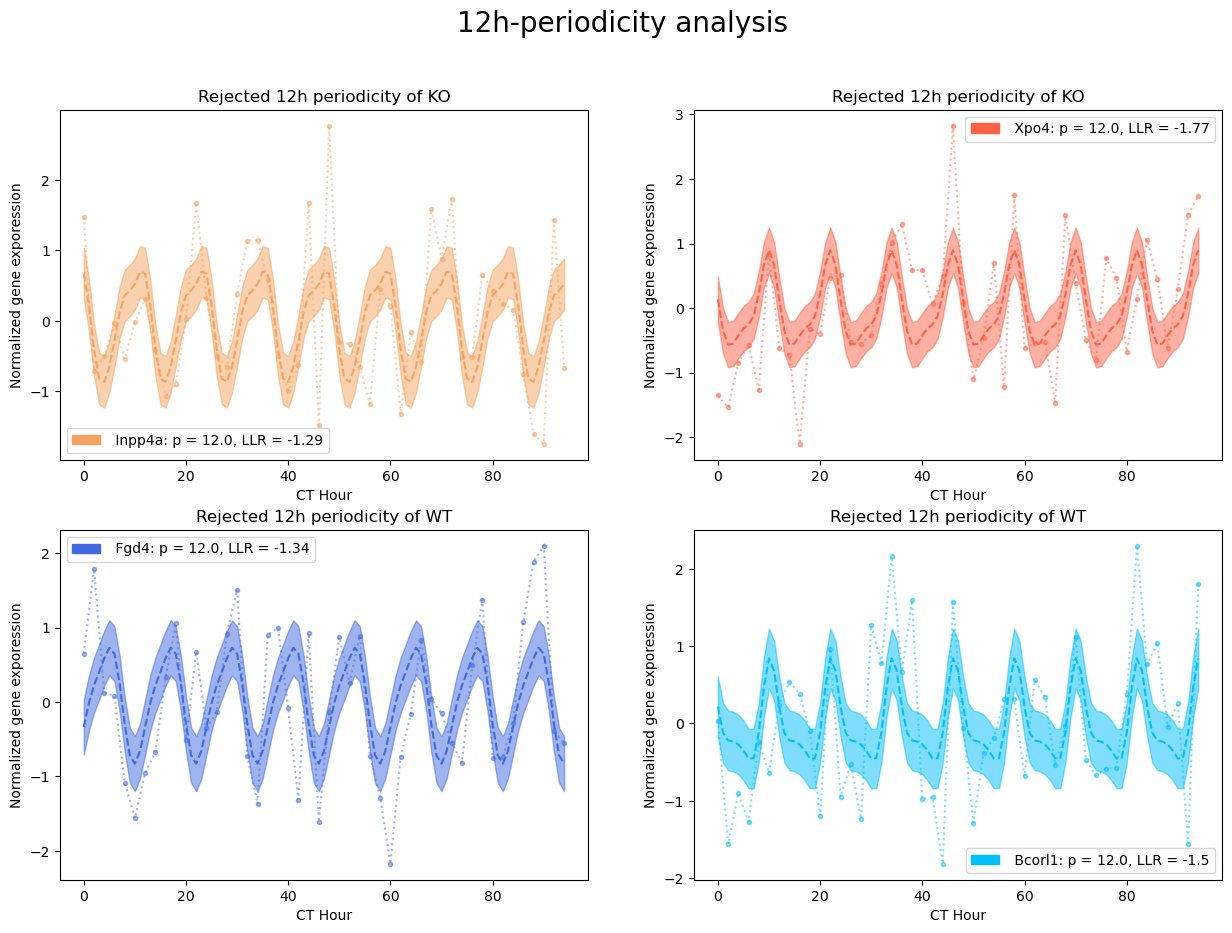

In [159]:
#Why 12h rhythms so little -> Check the distribution and plot 2 cases where noisesaround -1.5 for both cases -> Deduciton about the 12h rhythmicity detection on GP
KO_case_plot = [KO_plot[KO_plot['Gene_ID'] == 'Inpp4a'], KO_plot[KO_plot['Gene_ID'] == 'Xpo4']]
WT_case_plot = [WT_plot[WT_plot['Gene_ID'] == 'Fgd4'], WT_plot[WT_plot['Gene_ID'] == 'Bcorl1']]

KO_case_data= [KO_data[KO_data['Gene_ID'] == 'Inpp4a'], KO_data[KO_data['Gene_ID'] == 'Xpo4']]
WT_case_data = [WT_data[WT_data['Gene_ID'] == 'Fgd4'], WT_data[WT_data['Gene_ID'] == 'Bcorl1']]

KO_case = [KO[KO['Gene_ID'] == 'Inpp4a'], KO[KO['Gene_ID'] == 'Xpo4']]
WT_case = [WT[WT['Gene_ID'] == 'Fgd4'], WT[WT['Gene_ID'] == 'Bcorl1']]


plt.figure(figsize=(15,10))

#plt.subplot(1, 2, 1)

color_plt = ['sandybrown','tomato','royalblue','deepskyblue']

for i in range(len(KO_case)):
    plt.subplot(2, 2, 1+i)
    gene  = np.array(KO_case_data[i].iloc[:,1:], dtype = np.float32) #data.iloc[x,1:]
    x_torch = Array(np.arange(0,95,2)).to_tensor() 
    x_scale = Array(np.arange(0,95,1)).to_tensor() 

    t_torch = Array(gene.reshape(-1,1)).to_tensor()
    t_torch.norm()

    param_GP = Parameters()
    param_GP.p = KO_case_plot[i]['Period'].values[0]
    param_GP.l = KO_case_plot[i]['Lengthscale'].values[0]
    param_GP.sigma_f2 = KO_case_plot[i]['Var'].values[0]
    param_GP.sigma_n2 = KO_case_plot[i]['Noise'].values[0]

    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    final_pse.plot_f_gp(new_pse, color = color_plt[i])
    final_pse.plot_data(color = color_plt[i])

    p_1 = KO_case_plot[i]['Period'].values[0]
    LLR_1 = round(KO_case[i].LLR.values[0],2)
    n_1 = KO_case_plot[i]['Gene_ID'].values[0]
    first_patch = mpatches.Patch(color=color_plt[i],label= f' {n_1}: p = {p_1}, LLR = {LLR_1}')
    plt.legend(handles=[first_patch])
    plt.xlabel("CT Hour")
    plt.ylabel("Normalized gene exporession")
    plt.title('Rejected 12h periodicity of KO')

for j in range(len(WT_case)):
    plt.subplot(2, 2, 3+j)
    gene  = np.array(WT_case_data[j].iloc[:,1:], dtype = np.float32) #data.iloc[x,1:]
    x_torch = Array(np.arange(0,95,2)).to_tensor() 
    x_scale = Array(np.arange(0,95,1)).to_tensor() 

    t_torch = Array(gene.reshape(-1,1)).to_tensor()
    t_torch.norm()

    param_GP = Parameters()
    param_GP.p = WT_case_plot[j]['Period'].values[0]
    param_GP.l = WT_case_plot[j]['Lengthscale'].values[0]
    param_GP.sigma_f2 = WT_case_plot[j]['Var'].values[0]
    param_GP.sigma_n2 = WT_case_plot[j]['Noise'].values[0]

    final_pse = GaussianProcess(x_arr = x_torch, t_arr = t_torch, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    new_pse   = GaussianProcess(x_arr = x_scale, kernel_para = param_GP, ker_func = pse_kernel, covmat_func = cal_pse_cov_mat)
    final_pse.plot_f_gp(new_pse, color = color_plt[2+j])
    final_pse.plot_data(color = color_plt[2+j])

    p_1 = WT_case_plot[j]['Period'].values[0]
    n_1 = WT_case_plot[j]['Gene_ID'].values[0]
    LLR_1 = round(WT_case[j].LLR.values[0],2)
    
    first_patch = mpatches.Patch(color=color_plt[2+j],label= f' {n_1}: p = {p_1}, LLR = {LLR_1}')
    plt.legend(handles=[first_patch])
    plt.xlabel("CT Hour")
    plt.ylabel("Normalized gene exporession")
    plt.title('Rejected 12h periodicity of WT')
    
plt.suptitle("12h-periodicity analysis",fontsize=20)
#plt.savefig("Rejected_12.png")